## Paso 1. Abre el archivo de datos y estudia la información general 

In [9]:
# importar librerias con las cuales vamos a trabajar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [10]:
# importar Csv con los datos a trabajar 
games = pd.read_csv('games.csv')

In [11]:
print(games.duplicated().sum())
games.info()
games.head()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Paso 2. Preparacion de datos

In [6]:
# Ajustar nombres de columnas en minusculas
games.columns = games.columns.str.lower()

# Ajustar la fecha a entero y ajustar user_score a numerico. 
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [7]:

games['user_score'].replace('tbd', np.nan,inplace = True)
#games.user_score.unique()
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


##### Se ajustaron las columna de 'year_of_release' y 'user_score' a un tipo mas adecuado para poder realizar operaciones manejando los datos 'tbd' como nulos. 

In [9]:
# Podemos ver que porcentaje de datos son nulos.
games.isna().sum() / len(games) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [10]:
# Se puede eliminar los valores nulos de plataforma ya que representaria menos del 1 % del total de los datos.
games.dropna(subset=['name'], inplace = True)
# Se puede eliminar los valores nulos de 'year_of_release' ya que representaria menos del 1.6% % del total de los datos.
#games[games['year_of_release'].isna()]
games.dropna(subset=['year_of_release'], inplace = True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [11]:
# Adicional se ajustara un error que genera ruido sobre un juego en especifico ya que la consola para esa fecha aun no existia
games.loc[15957, 'year_of_release'] = 2007

##### Se decide dejar los valores de critic_score, user_score en blanco ya que no contamos con la informacion necesaria para poder completarlos y llenarlos solo con la media o la mediana puede afectar el valor de los datos, tampoco se eliminan ya que puede afectar el valor de las otras colummnas a lo largo del proyecto se tomaran decisiones para hacer uso exclusivo de estas tres columnas.

### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [14]:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Paso 3. Analiza los datos

### cuántos juegos fueron lanzados en diferentes años

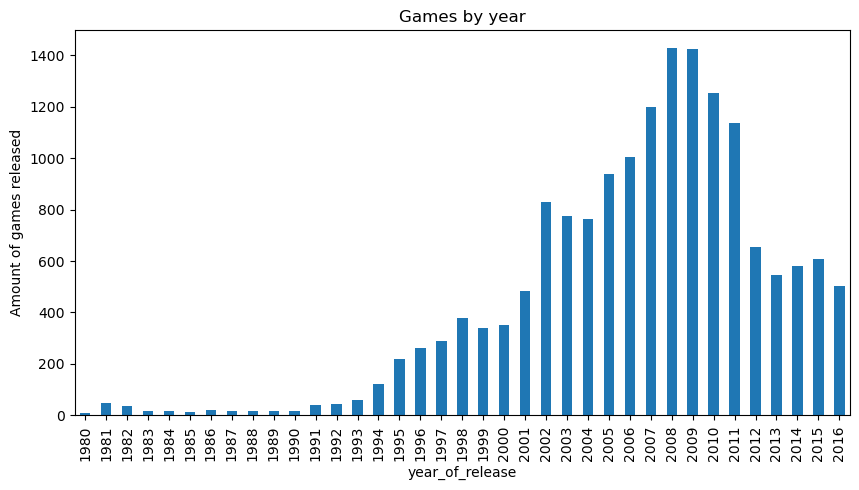

In [17]:
games_by_year = games.groupby('year_of_release')['year_of_release'].count().reset_index(name = 'count')
games_by_year.plot(x = 'year_of_release',
                y = 'count',
                legend = False,
                ylabel = 'Amount of games released',
                title = 'Games by year',
                kind = 'bar',
                figsize =[10,5])
plt.show()

### Observa cómo varían las ventas de una plataforma a otra.

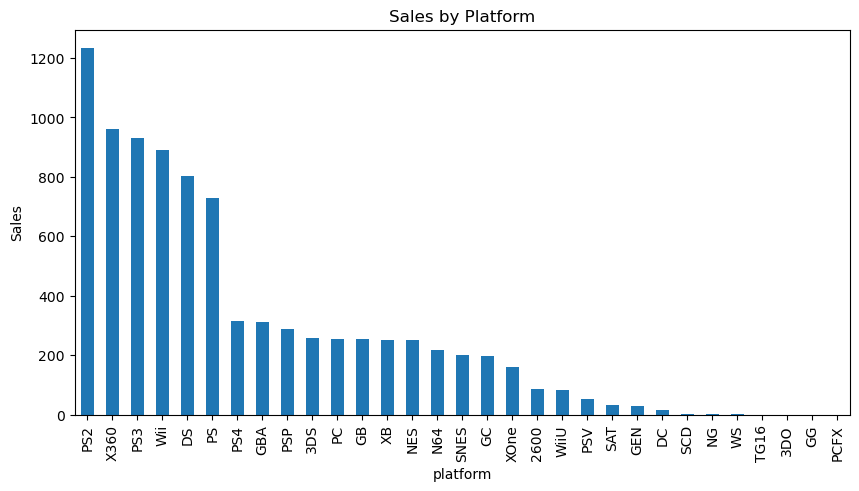

In [19]:
#games_by_platform = games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
games_by_platform = games.groupby('platform',)['total_sales'].sum().sort_values(ascending=False).reset_index()

#el siguiente codigo sirve para mostrar las plataformas con ventas superiores a 100 millones
#games_by_platform = games_by_platform[games_by_platform['total_sales']>=100]
games_by_platform.plot(x = 'platform',
                y = 'total_sales',
                legend = False,
                ylabel = 'Sales',
                title = 'Sales by Platform',
                kind = 'bar',
                figsize =[10,5]
                )
plt.show()

### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

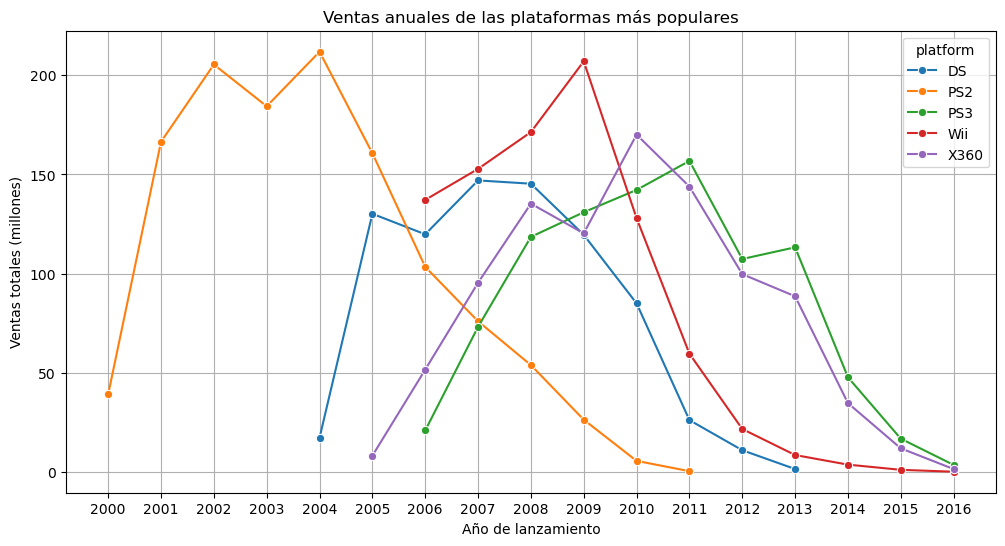

In [21]:
# Filtrar solo las plataformas top
top_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

# Generar una lista con los juegos Top
top_platforms_names = top_platforms.index.tolist()
df_top = games[games['platform'].isin(top_platforms_names)]

# Agrupar por plataforma y año
sales_by_platform_year = df_top.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#sales_from_2000 = sales_by_platform_year[sales_by_platform_year['year_of_release'] >= 2000]
# Gráfico de líneas
unique_years = sorted(sales_by_platform_year['year_of_release'].unique())
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sales_by_platform_year,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    marker='o'
)
plt.title('Ventas anuales de las plataformas más populares')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.xticks(unique_years)
plt.show()

### Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

In [23]:
# Calcular  el año en el que salieron las consolas y el ultimo año donde se lanzaron juegos
last_year = games.groupby('platform')['year_of_release'].agg(total_sales = 'sum', year_of_release = 'max').sort_values(by = 'total_sales',ascending=False).reset_index()

# Calculamos las consolas que no han tenido juegos en el ultimo año
last_year = last_year[last_year['year_of_release'] < 2016]
last_year.head(5)

,platform,total_sales,year_of_release
0,PS2,4263750,2011
1,DS,4259383,2013
5,PSP,2396417,2015
6,PS,2377627,2003
8,GBA,1624604,2007


### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

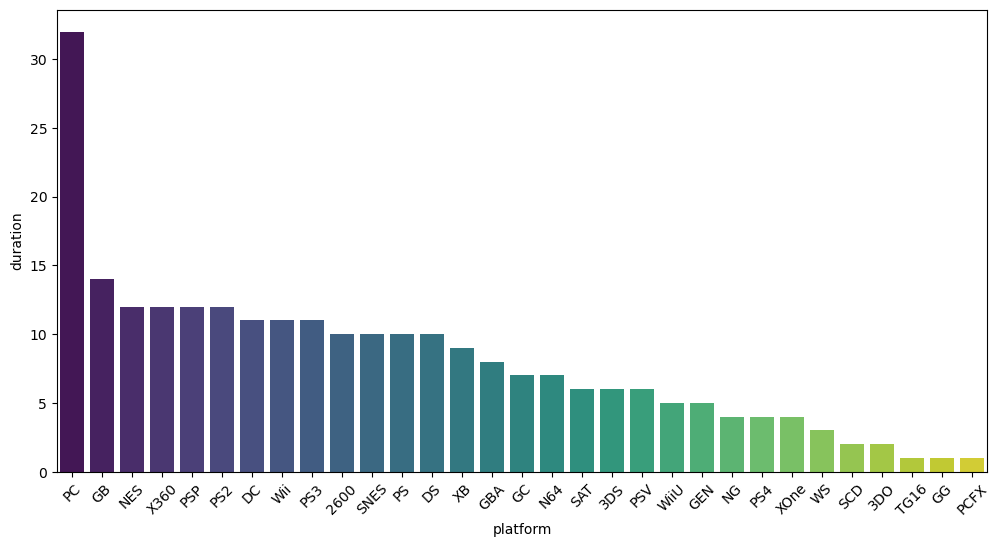

In [25]:
# Calcular primer y último año de ventas por plataforma
lifecycle = games.groupby('platform')['year_of_release'].agg(['min', 'max']).rename(columns={'min': 'first_year', 'max': 'last_year'})

# Duración en años (se agrega +1 para poder contar el año de inicio) 
lifecycle['duration'] = lifecycle['last_year'] - lifecycle['first_year'] +1

# Ordenar por duración
lifecycle = lifecycle.sort_values(by = 'duration', ascending=False).reset_index()
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=lifecycle,
                      x='platform',
                      y='duration',
                      palette="viridis",
                      hue = 'platform')
plt.xticks(rotation=45)

plt.show()


In [226]:
# Calcula la media de la duración mensual de los años de duracion.
lifecycle
print('La vida util de una consola esta alrededor de' ,lifecycle['duration'].mean(),'años')

La vida util de una consola esta alrededor de 8.0 años


### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [28]:
# Tomando en cuenta la media y la normalizaion de ventas de los ultimos años, se onsidera prudente usar los ultimos 5 años, es decir desde el 2012

games_filtered = games[games['year_of_release'] >= 2012]
games_filtered['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

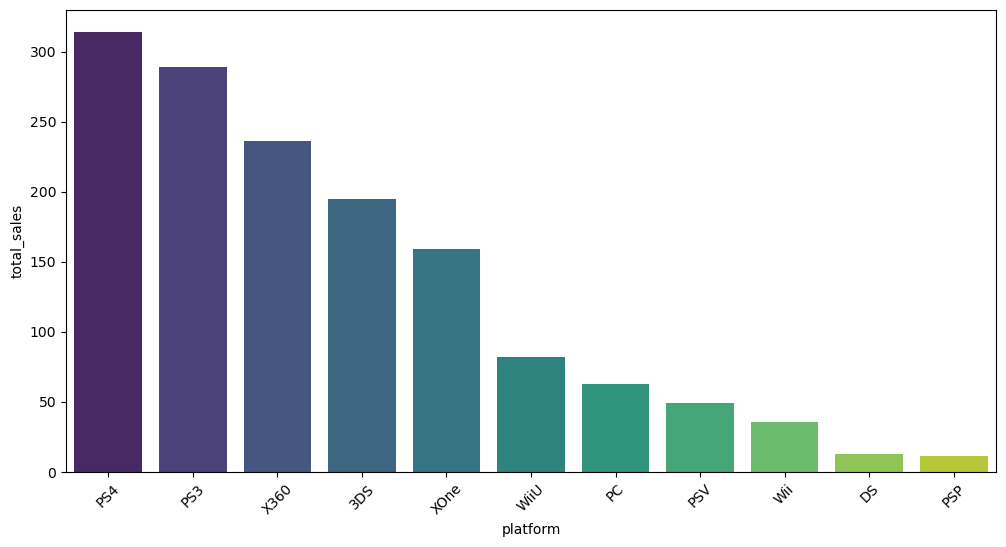

In [30]:
sales_by_plat = games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sales_by_plat,
                      x='platform',
                      y='total_sales',
                      palette="viridis",
                      hue = 'platform')
plt.xticks(rotation=45)
plt.show()

#### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

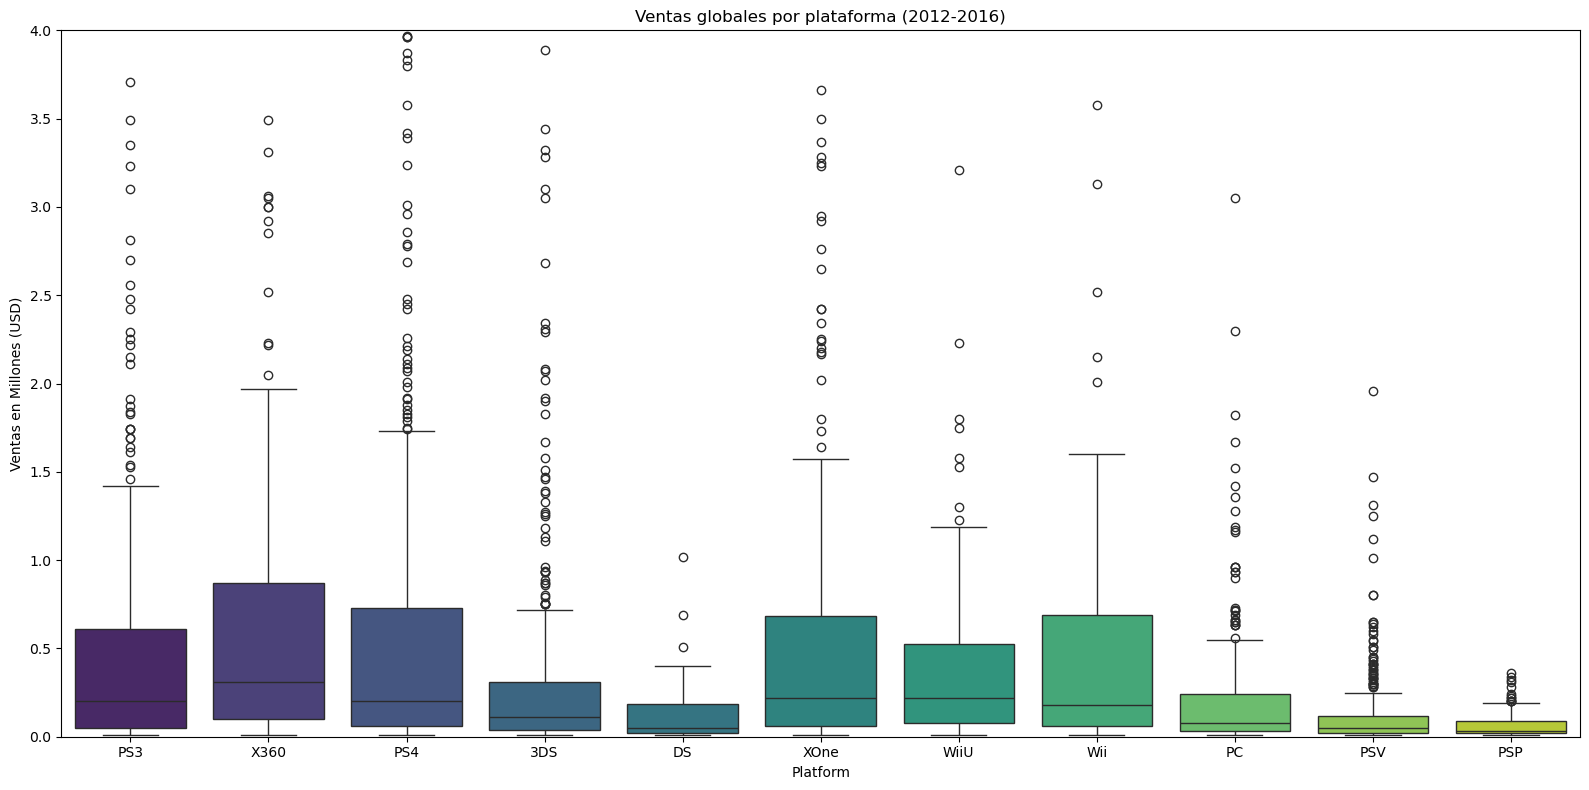

In [32]:
plt.figure(figsize=(16,8))
sns.boxplot(data = games_filtered,
            x= 'platform',
            y= 'total_sales',
            hue = 'platform',
            palette="viridis")
plt.title('Ventas globales por plataforma (2012-2016)')
plt.xlabel('Platform')
plt.ylabel('Ventas en Millones (USD)')
plt.ylim(0,4)
plt.tight_layout()
plt.show()

##### Como se puede observar el grafico de barras las plataformas ccomo Xonem PS4 que son consolas de actual generacion presentan una mediana casi que similiar y las distribucion de datos tampoco es muy dispersa, lo que podemos obserar es que hay ventas de PS4 con datos atipicos mas altos lo que nos podria indicar que la consola ha vendido titulos con mas exitos que las otras

#### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

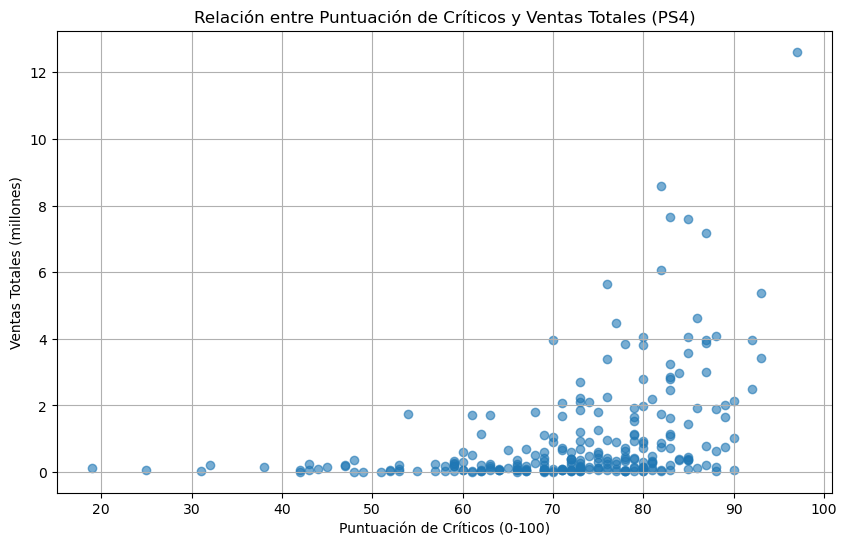

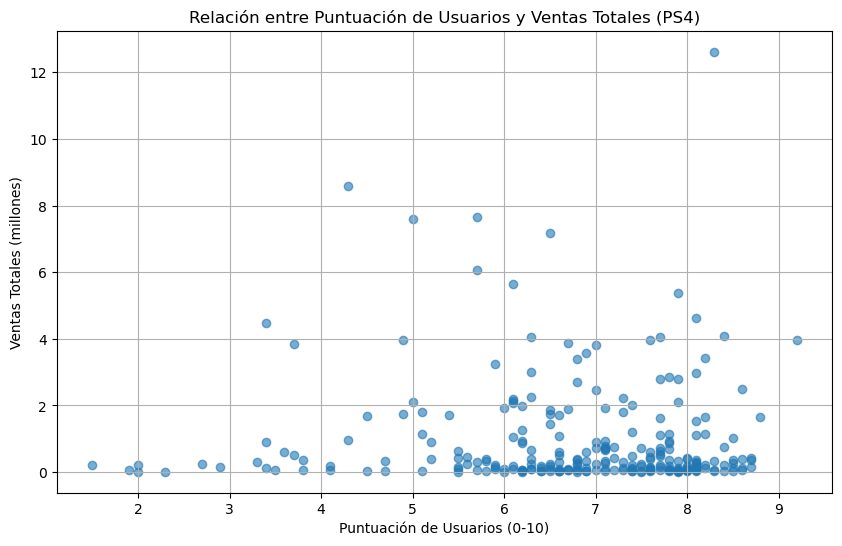

              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.033625
total_sales       0.406568   -0.033625     1.000000


In [35]:
## Para el ejerccicio usaremos PS4 ya que cuenta con mejores ventas
games_ps4 = games_filtered[games_filtered['platform']=='PS4']
#games_ps4 = games_ps4.dropna(subset=['critic_score'])

analysis_data = games_ps4[['critic_score','user_score', 'total_sales']]
games_ps4_crit = analysis_data.dropna(subset=['critic_score'])

plt.figure(figsize=(10, 6))
plt.scatter(games_ps4_crit['critic_score'], games_ps4_crit['total_sales'], alpha=0.6)
plt.title('Relación entre Puntuación de Críticos y Ventas Totales (PS4)')
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.scatter(games_ps4_crit['user_score'], games_ps4_crit['total_sales'], alpha=0.6)
plt.title('Relación entre Puntuación de Usuarios y Ventas Totales (PS4)')
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

plt.show()

corr = games_ps4_crit.corr()
print(corr)


##### Como podemos ver en cuanto a la relacion de la critica con la ventas tenemos una correlacion positiva media lo que nos podria indicar que la critica es influyente pero no es un factor decisivo para las ventas exitosas en los videjuegos.
##### Por el otro lado la puntuacion de los usuarios no tiene una correlacion marcada que nos indique si este factor es influyente ya que es muy cercano a 0

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

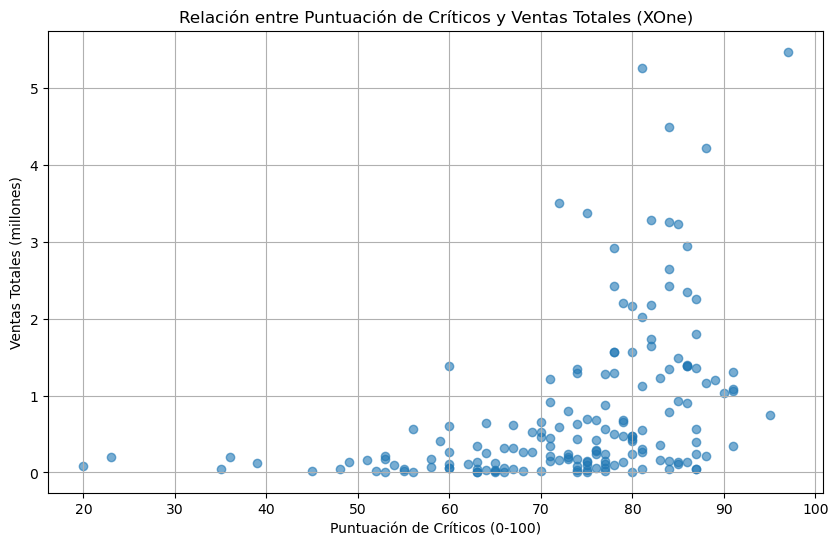

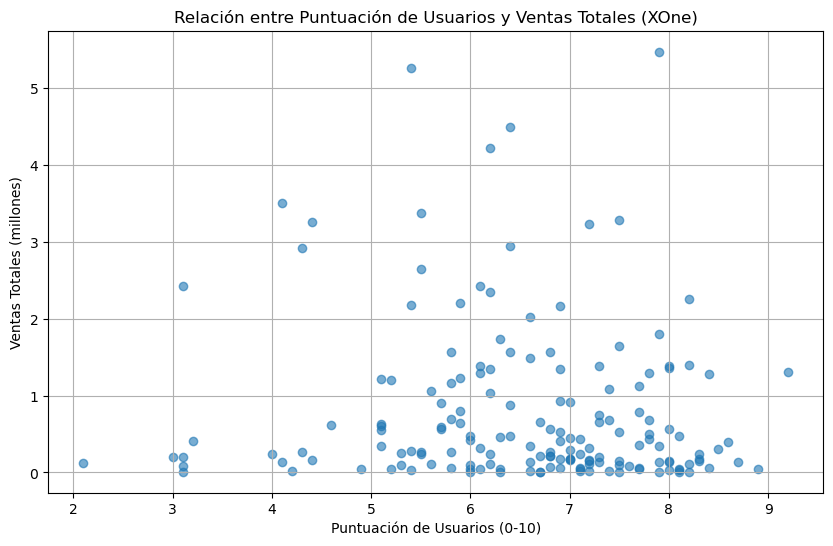

              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.416998
user_score        0.472462    1.000000    -0.094003
total_sales       0.416998   -0.094003     1.000000


In [38]:
## Para el ejerccicio usaremos XOne
games_ps4 = games_filtered[games_filtered['platform']=='XOne']
#games_ps4 = games_ps4.dropna(subset=['critic_score'])

analysis_data = games_ps4[['critic_score','user_score', 'total_sales']]
games_ps4_crit = analysis_data.dropna(subset=['critic_score'])

plt.figure(figsize=(10, 6))
plt.scatter(games_ps4_crit['critic_score'], games_ps4_crit['total_sales'], alpha=0.6)
plt.title('Relación entre Puntuación de Críticos y Ventas Totales (XOne)')
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.scatter(games_ps4_crit['user_score'], games_ps4_crit['total_sales'], alpha=0.6)
plt.title('Relación entre Puntuación de Usuarios y Ventas Totales (XOne)')
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

plt.show()
corr = games_ps4_crit.corr()
print(corr)

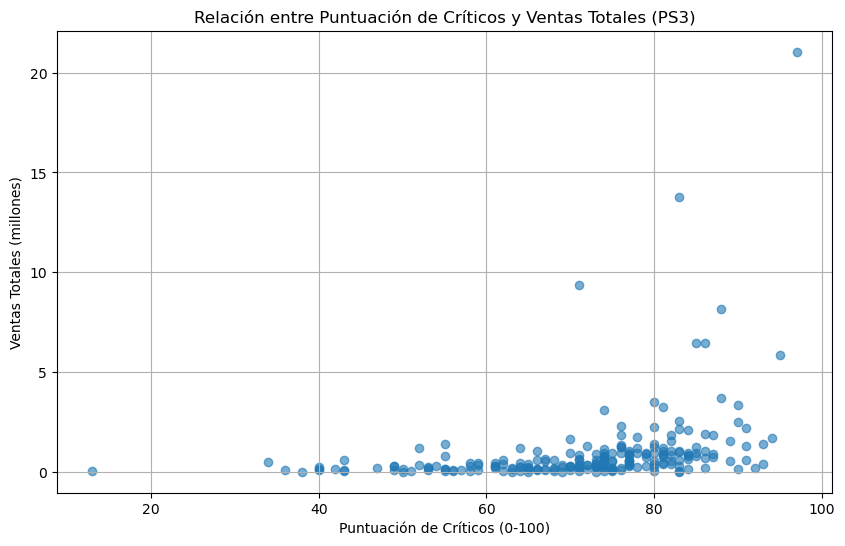

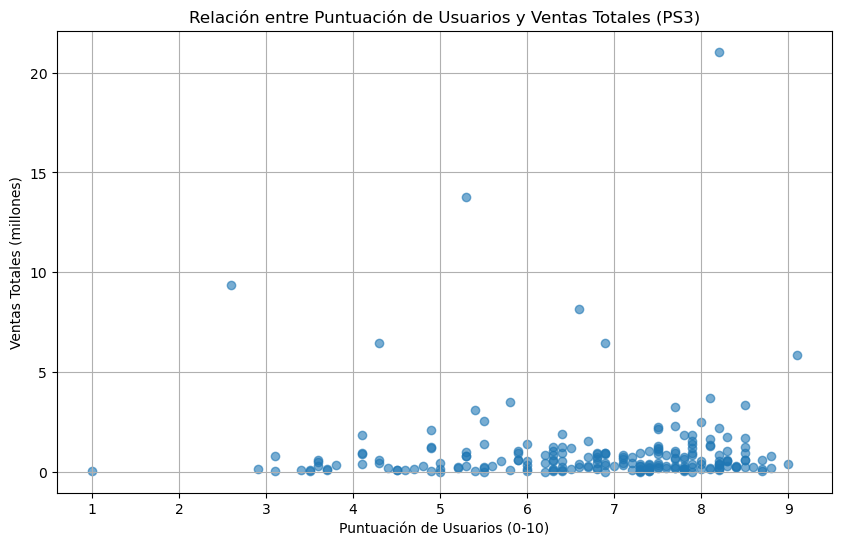

              critic_score  user_score  total_sales
critic_score      1.000000    0.539456     0.331497
user_score        0.539456    1.000000     0.003227
total_sales       0.331497    0.003227     1.000000


In [39]:
## Para el ejerccicio usaremos PS3
games_ps4 = games_filtered[games_filtered['platform']=='PS3']
#games_ps4 = games_ps4.dropna(subset=['critic_score'])

analysis_data = games_ps4[['critic_score','user_score', 'total_sales']]
games_ps4_crit = analysis_data.dropna(subset=['critic_score'])

plt.figure(figsize=(10, 6))
plt.scatter(games_ps4_crit['critic_score'], games_ps4_crit['total_sales'], alpha=0.6)
plt.title('Relación entre Puntuación de Críticos y Ventas Totales (PS3)')
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.scatter(games_ps4_crit['user_score'], games_ps4_crit['total_sales'], alpha=0.6)
plt.title('Relación entre Puntuación de Usuarios y Ventas Totales (PS3)')
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

plt.show()
corr = games_ps4_crit.corr()
print(corr)

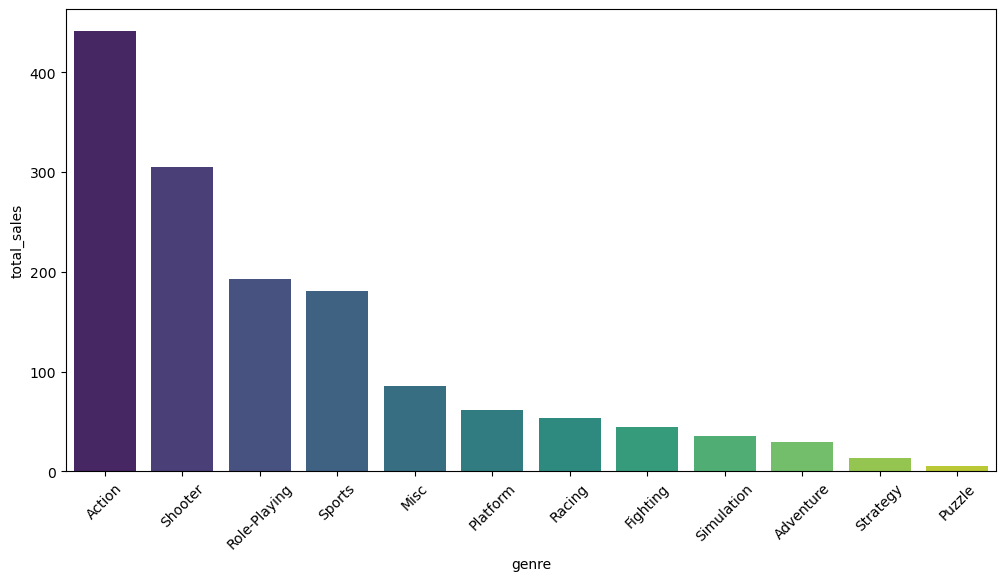

In [40]:
games_by_genre = games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data = games_by_genre,
                      x='genre',
                      y='total_sales',
                      palette="viridis",
                      hue = 'genre')
plt.xticks(rotation=45)
plt.show()

##### Los generos mas rentables serian los juegos de accion, seguido por juegos de disparos y juegos de rol

## Paso 4. Crea un perfil de usuario para cada región

#### Las cinco plataformas principales.

In [100]:
# Por cada Region se crea un perfil con el top 5 por region

na_sales = games_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending = False).reset_index()
eu_sales = games_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).reset_index()
jp_sales = games_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).reset_index()

na_sales_top = na_sales.head(5)
eu_sales_top = eu_sales.head(5)
jp_sales_top = jp_sales.head(5)

# Para NA
na_sales_top = na_sales_top.copy()
na_sales_top['percentage'] = na_sales_top['na_sales'] / na_sales_top['na_sales'].sum() * 100

# Para EU
eu_sales_top = eu_sales_top.copy()
eu_sales_top['percentage'] = eu_sales_top['eu_sales'] / eu_sales_top['eu_sales'].sum() * 100

# Para JP
jp_sales_top = jp_sales_top.copy()
jp_sales_top['percentage'] = jp_sales_top['jp_sales'] / jp_sales_top['jp_sales'].sum() * 100

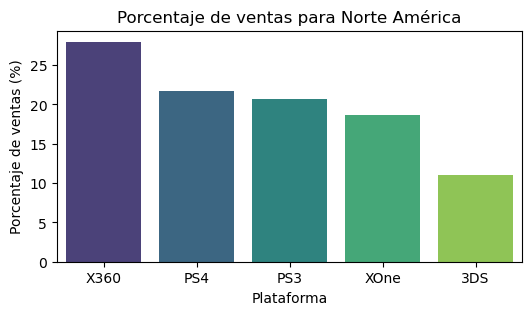

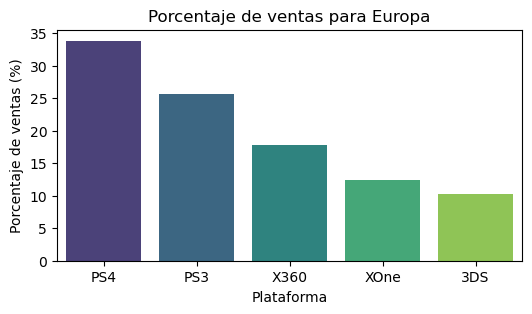

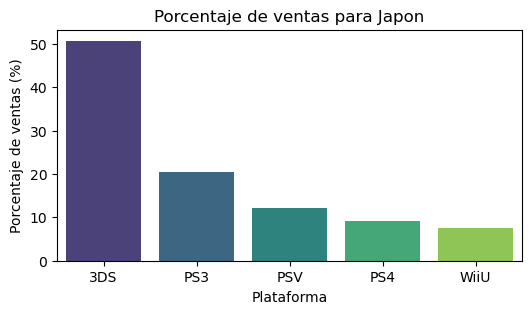

In [98]:
plt.figure(figsize=(6, 3))
barplot = sns.barplot(data = na_sales_top,
                      x='platform',
                      y='percentage',
                      palette="viridis",
                      hue = 'platform')
plt.title('Porcentaje de ventas para Norte América')
plt.xlabel('Plataforma')
plt.ylabel('Porcentaje de ventas (%)')

plt.figure(figsize=(6, 3))
barplot = sns.barplot(data = eu_sales_top,
                      x='platform',
                      y='percentage',
                      palette="viridis",
                      hue = 'platform',
                      )
plt.title('Porcentaje de ventas para Europa')
plt.xlabel('Plataforma')
plt.ylabel('Porcentaje de ventas (%)')

plt.figure(figsize=(6, 3))
barplot = sns.barplot(data = jp_sales_top,
                      x='platform',
                      y='percentage',
                      palette="viridis",
                      hue = 'platform')
plt.title('Porcentaje de ventas para Japon')
plt.xlabel('Plataforma')
plt.ylabel('Porcentaje de ventas (%)')

plt.show()

##### como podemos obersvar cada region tiene sus preferencias en cuanto a paltaformas, norte america prefiere el xbox 360, mientras que los eurpeos se decantan mas por la PS4 y finalmente el pais del sol naciente tiene preferencia por la consola portatil de nintendo.

#### Los cinco géneros principales.

In [107]:
na_sales = games_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending = False).reset_index()
eu_sales = games_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).reset_index()
jp_sales = games_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).reset_index()

na_sales_top = na_sales.head(5)
eu_sales_top = eu_sales.head(5)
jp_sales_top = jp_sales.head(5)

# Para NA
na_sales_top = na_sales_top.copy()
na_sales_top['percentage'] = na_sales_top['na_sales'] / na_sales_top['na_sales'].sum() * 100

# Para EU
eu_sales_top = eu_sales_top.copy()
eu_sales_top['percentage'] = eu_sales_top['eu_sales'] / eu_sales_top['eu_sales'].sum() * 100

# Para JP
jp_sales_top = jp_sales_top.copy()
jp_sales_top['percentage'] = jp_sales_top['jp_sales'] / jp_sales_top['jp_sales'].sum() * 100

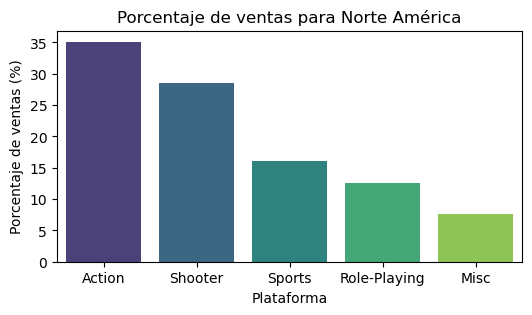

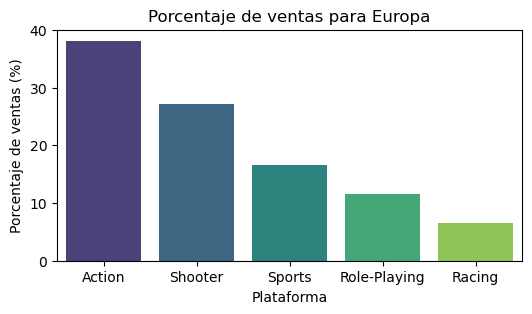

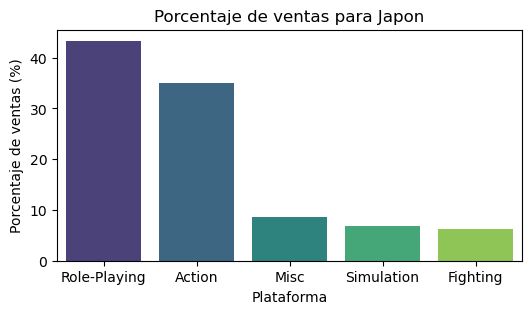

In [109]:
plt.figure(figsize=(6, 3))
barplot = sns.barplot(data = na_sales_top,
                      x='genre',
                      y='percentage',
                      palette="viridis",
                      hue = 'genre')
plt.title('Porcentaje de ventas para Norte América')
plt.xlabel('Plataforma')
plt.ylabel('Porcentaje de ventas (%)')

plt.figure(figsize=(6, 3))
barplot = sns.barplot(data = eu_sales_top,
                      x='genre',
                      y='percentage',
                      palette="viridis",
                      hue = 'genre',
                      )
plt.title('Porcentaje de ventas para Europa')
plt.xlabel('Plataforma')
plt.ylabel('Porcentaje de ventas (%)')

plt.figure(figsize=(6, 3))
barplot = sns.barplot(data = jp_sales_top,
                      x='genre',
                      y='percentage',
                      palette="viridis",
                      hue = 'genre')
plt.title('Porcentaje de ventas para Japon')
plt.xlabel('Plataforma')
plt.ylabel('Porcentaje de ventas (%)')

plt.show()

##### Como podemos ver los generos no varian mucho en popularidad si hablamos de Norte america y Eurpoa siendo los generos de accion y disparos los mas populares, sin embargo japon es totalmente diferente es sus preferencias siendo mas populares los juegos de rol.

<Figure size 1000x500 with 0 Axes>

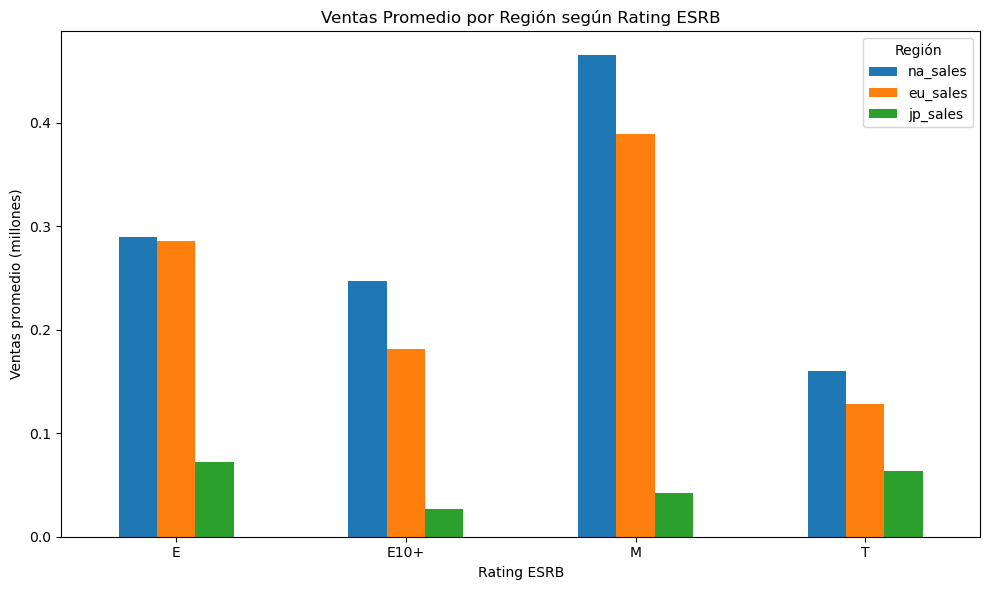

In [146]:
df_rating = games_filtered.dropna(subset = ['rating'])
sales_by_rating = df_rating.groupby('rating').agg({'na_sales': 'mean','eu_sales': 'mean','jp_sales': 'mean'}).reset_index()
sales_by_rating

# Gráfico de ventas por rating y región
plt.figure(figsize=(10,5))
sales_by_rating.plot(
    x='rating',
    y=['na_sales', 'eu_sales', 'jp_sales'],
    kind='bar',
    figsize=(10, 6),
    title='Ventas Promedio por Región según Rating ESRB'
)
plt.ylabel('Ventas promedio (millones)')
plt.xlabel('Rating ESRB')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.tight_layout()
plt.show()

##### Podriamos decir que la clasificacion ESRB no afecta mucho las ventas por la region de europa y america ya que en promedio la tendencia en ventas se mantiene similar, sin embargo si parece tener cierto grado de relevancia en japon ya que las tendencias si fluctuan segun si rating

### Paso 5. Prueba las siguientes hipótesis:

##### — Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

    H0: las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales
    H1: las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas

In [174]:
# nivel crítico de significación estadística
alpha = 0.05

score_xone = games_filtered[games_filtered['platform'] == 'XOne']['user_score'].dropna()
score_pc = games_filtered[games_filtered['platform'] == 'PC']['user_score'].dropna()

# hipotesis sobre igualdad de dos plobaciones.
results = st.ttest_ind(score_xone,score_pc, equal_var = False)


print('valor p:',results.pvalue) 

# Se compara los valores p obtenidos con el nivel de significación estadística
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print(f'la clasificacion promedio de los usuarios para Xbox One es: {score_xone.mean()}')
print(f'la clasificacion promedio de los usuarios para PC es: {score_pc.mean()}')

valor p: 0.5489537965134912
No podemos rechazar la hipótesis nula
la clasificacion promedio de los usuarios para Xbox One es: 6.521428571428572
la clasificacion promedio de los usuarios para PC es: 6.4286407766990274



##### —  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

    H0: las clasificaciones promedio de los usuarios para los generos de accion y deporte son iguales
    H1: las clasificaciones promedio de los usuarios para los generos de accion y deporte son distintas

In [197]:
# nivel crítico de significación estadística
alpha = 0.05

score_action = games_filtered[games_filtered['genre'] == 'Action']['user_score'].dropna()
score_sport = games_filtered[games_filtered['genre'] == 'Sports']['user_score'].dropna()

# hipotesis sobre igualdad de dos plobaciones.
results = st.ttest_ind(score_action,score_sport)


print('valor p:',results.pvalue) 

# Se compara los valores p obtenidos con el nivel de significación estadística
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print(f'la clasificacion promedio del genero accion es: {score_action.mean()}')
print(f'la clasificacion promedio del genero deportes es: {score_sport.mean()}')

valor p: 3.7163089460934874e-26
Rechazamos la hipótesis nula
la clasificacion promedio del genero accion es: 6.825047801147227
la clasificacion promedio del genero deportes es: 5.455897435897437


#### Se uso una pureba de hipotesis ttest para verificar el valor de dos poblaciones y determinar su parecido.

### Conclusiones


##### A lo largo del proyecto pudimos observar los diferentes comportamientos que tienen los usuarios en cuanto a videojuegos segun sus ventas, ya sea por region o en total de lo cual podemos decir lo siguiente:

Las ventas en videojuegos ha crecido desde sus inicios alcanzando su pico en los años 2006 y 2011, teniendo en cuenta que son años donde nuevas genereaciones de consolas estaban naciendo y otras muriendo.

La plataforma mas popular fue la PS2 con mas de 1200 millones de dolares en ventas, seguido por xbox 360.

La vida util de una consola esta en alrededor de 8 años, esto igualmente puede variar por dos razones, la priemra es que las primeras consolas no tuvieron mucho tiempo en el mercado como las actuales y la segunda es que el Pc se ha mantenido sin cambios desde que salio y al dia de hoy se siguen sacando juegos para su venta. 

Tomando en cuenta los ultimos 5 años en ventas vemos que igualmente las consolas de PLay station siguen teniendobuenas ventas.

Como se puede observar el grafico de barras las plataformas como Xonem PS4 que son consolas de actual generacion presentan una mediana casi que similiar y las distribucion de datos tampoco es muy dispersa, lo que podemos observar es que hay ventas de PS4 con datos atipicos mas altos lo que nos podria indicar que la consola ha tenido varios exitos en ventas.

Si bien la relacion de la critica con las ventas tenemos una correlacion positiva media lo que nos podria indicar que la critica es influyente pero no es un factor decisivo para las ventas exitosas en los videjuegos esto con una correlacion 0.4 y es un comportamiento casi similiar con otras consolas.

Podemos ver que el comportamiento del mercado asiatico (Japon) es un poco diferente al mercado americano y erupeo en cuanto a preferencias ya sea por genero o por consolas. 
